# Insurance cost
## Orkhan Amrullayev

A health insurance firms can make money if it collects more than it spends on the medical care of its beneficiaries.  Even though some conditions are more prevalent for certain segments of the population, medical costs are difficult to predict since most money comes from rare conditions of the patients. The objective of this paper is to accurately predict insurance costs based on people’s data listed below.

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance (dependent)


## Contents

1. Importing libraries and reading dataset
2. General exploratory Data Analysis
3. Relationship between features
4. Data Preparation
5. Conclusion of EDA
6. Label encoding
7. Modelling
    - DecisionTree
    - RandomForest
    - KNeighbors
    - AdaBoostRegressor
    - GradientBoosting
    - XGBRegressor
8. Cross Validation
9. Model Accuracy Comparison

Importing libraries for:
- visualization
- linear regression
- train-test split
- cross validation 
- scaling
- models

In [ ]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Linear Regression
from scipy.stats import linregress

#Train_test_split
from sklearn.model_selection import train_test_split

#cross_val_score
from sklearn.model_selection import cross_val_score

#scaling
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report,accuracy_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt

#models

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
#score
from sklearn.metrics import r2_score

In [ ]:
#Importing data
df = pd.read_csv("../input/insurance/insurance.csv")

# General exploratory data analysis


In [ ]:
# take a look at fist 5 rows of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


By describe function we will see diffeent set of statistical measures of the dataset

In [ ]:
# statistical measures
display(df.describe())

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Getting more information about data set, incuding missing values and data types which are categorical and numeric here.

In [ ]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Findings:

There are four numerical variables:
    - Continuous:
    - Age
    - BMI
    - Charges
    - Discrete:
    - children  
There are three categorical variables:
    - Sex
    - Smoker
    - Region

##### It is important to figure out if there is a relationship between the features and each other

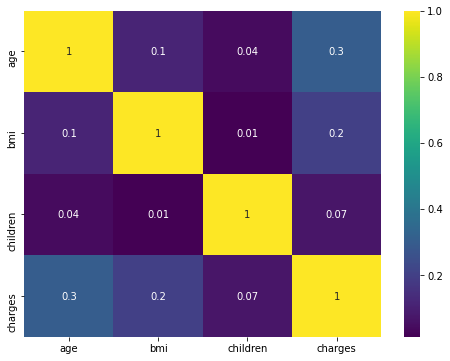

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=True);

From the correlation matrics we can concude that there is not strong relationship between features (hence, further searches including colinearity is not needed)

# Data Preparation

### Checking the missing data. If we have missing values, then we can either skip it (if they are not so much) or impute them according to set of methods and according to the types of the data.

In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no missing data.

### Checking the outliers
Identification of potential outliers is important because:

- An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly. If it can be determined that an outlying point is in fact erroneous, then the outlying value should be deleted from the analysis (or corrected if possible).
- In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we typically do not want to simply delete the outlying observation. However, if the data contains significant outliers, we may need to consider the use of robust statistical techniques.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bmi'>

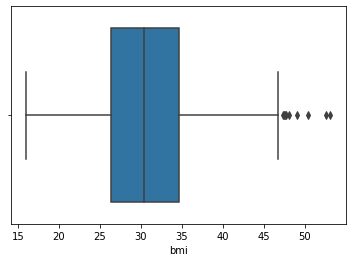

In [ ]:
# Bmi
sns.boxplot(df['bmi'])

## Apparently we have some outliers

### Defining 1st and 3rd quantiles and finding their values

In [ ]:
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
Q1, Q3

(26.29625, 34.69375)

### Finding interquartile range

In [ ]:
IQR = Q3 - Q1
IQR

8.3975

### Defining the upper and lower limit. any value exceeding them is a potential outlier

In [ ]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(13.7, 47.290000000000006)

### Let's find out outliers and their observeations

In [ ]:
df[df['bmi'] > upper_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.32540
286,46,female,48.07,2,no,northeast,9432.92530
401,47,male,47.52,1,no,southeast,8083.91980
543,54,female,47.41,0,yes,southeast,63770.42801
847,23,male,50.38,1,no,southeast,2438.05520
860,37,female,47.60,2,yes,southwest,46113.51100
1047,22,male,52.58,1,yes,southeast,44501.39820
1088,52,male,47.74,1,no,southeast,9748.91060
1317,18,male,53.13,0,no,southeast,1163.46270


### The number of the observations with outliers are only 9 records! As it is not a big number, we can get red of them safely. It will leave no big impact on the representation of th eoriinal data

In [ ]:
df_new = df.drop(df.index[[116,401,286,543,847,860,1047,1088,1317]])

# Exploratory data Analysis

### First, taking a look at the features and its effect in the target "charges" may be beneficial to unearth some hidden paterns with the dataet. Let's see the relatiosnhip between charges and bmi with smoker feature.


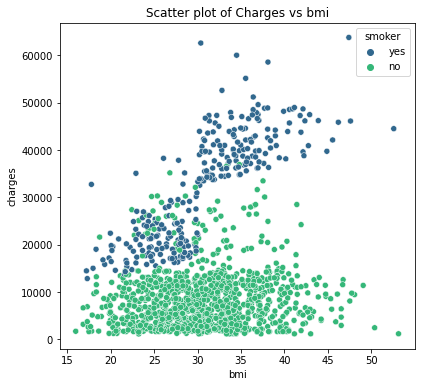

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

### Insights from the anaysis is that:
### - Most of the people who smoke are obese people (high BMI)
### - Even though a person is not obese but he/she smokes, his/her charges tends to be higher.


In [ ]:
df["bmi"].value_counts()   # Body mass index, providing an understanding of body, ideally 18.5 to 24.9

32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64

### It will be clearer classifing people into categories according to their "bmi".

In [ ]:
df['weight_condition'] = np.nan
data = [df]

for col in data:
    col.loc[col.bmi < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col.bmi >= 18.5) & (col.bmi < 24.986), "weight_condition"] = "Normal"
    col.loc[(col.bmi >= 25) & (col.bmi < 29.926), "weight_condition"] = "Overweight"
    col.loc[col.bmi >= 30, "weight_condition"] = "Obese"


### Getting a new dataset with classified bmi columns.

In [ ]:
df.drop("bmi", axis = 1, inplace = True)
display(df.head())

,age,sex,children,smoker,region,charges,weight_condition
0,19,female,0,yes,southwest,16884.92400,Overweight
1,18,male,1,no,southeast,1725.55230,Obese
2,28,male,3,no,southeast,4449.46200,Obese
3,33,male,0,no,northwest,21984.47061,Normal
4,32,male,0,no,northwest,3866.85520,Overweight


### Relationship between Age and Insurance charges

Text(0.5, 1.0, 'Scatter plot of Charges vs age')

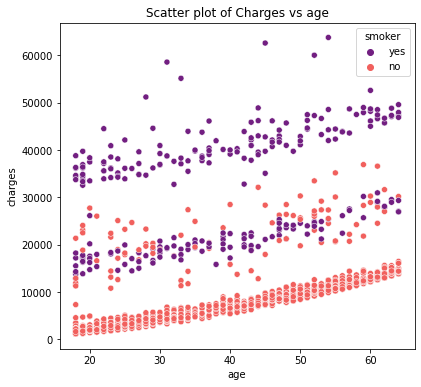

In [ ]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')


### Insights from the analysis is that:
### - Charges increases as the age of the person increases
### - Smokers and obese people have the highest charges regardless of their age.

### Classifing ages to young adult, senior adult and elder categories.

In [ ]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    

### Getting updated dataset

In [ ]:
df.drop("age", axis = 1, inplace = True)
df.head()

,sex,children,smoker,region,charges,weight_condition,age_cat
0,female,0,yes,southwest,16884.92400,Overweight,Young Adult
1,male,1,no,southeast,1725.55230,Obese,Young Adult
2,male,3,no,southeast,4449.46200,Obese,Young Adult
3,male,0,no,northwest,21984.47061,Normal,Young Adult
4,male,0,no,northwest,3866.85520,Overweight,Young Adult


### Sex distribution: 

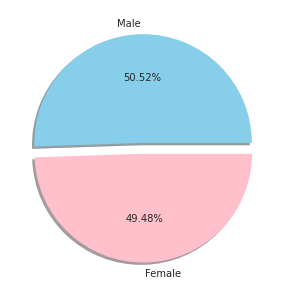

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(5,5))
plt.pie(x=df["sex"].value_counts(), 
        colors=["skyblue","pink"], 
        labels=["Male","Female"], 
        shadow = True, 
        autopct="%1.2f%%", 
        explode = (0, 0.1)
        )
plt.show()

### Almost the same proportion


### Checking the charges distributions for males and females

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


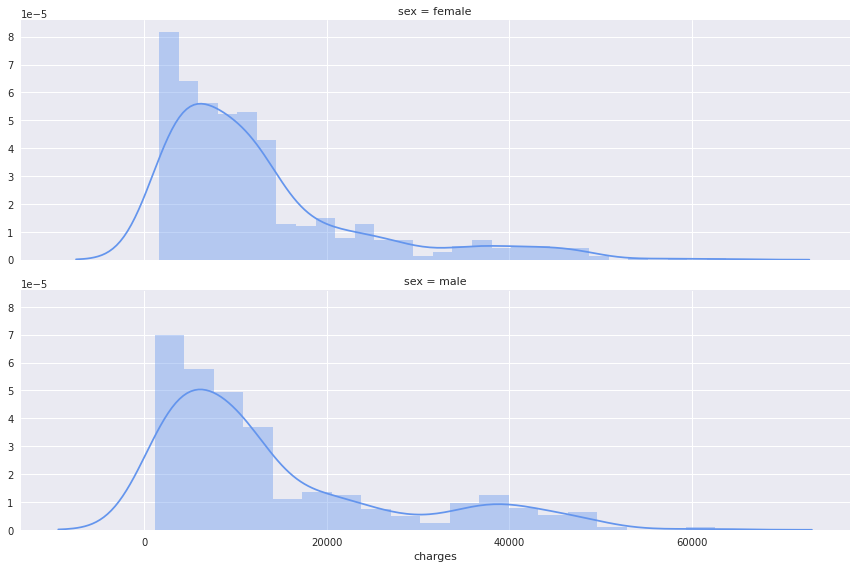

In [ ]:
x1 = sns.FacetGrid(df, row='sex', height=4, aspect=3)
x1 = x1.map(sns.distplot, 'charges', color='cornflowerblue')
plt.show()


### As we can see the two distributions are almost the same for both women/men, so we can affirm that there is no influence on the medical charges when it comes to the sex variable.

###  How many children our patients have.



/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


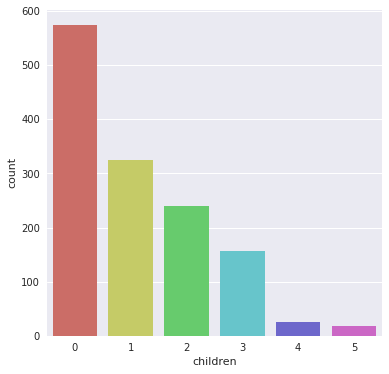

In [ ]:
plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(df["children"], palette="hls");

### Most patients do not have children

### Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.

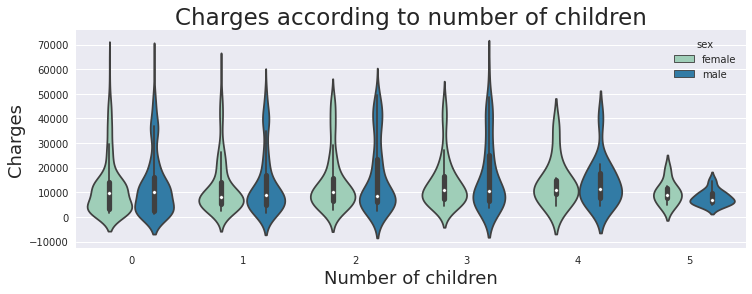

In [ ]:
#Creating a violinplot for each category
plt.figure(figsize=(12,4))
sns.violinplot(x='children', y='charges', data=df, hue='sex', palette='YlGnBu')
plt.title('Charges according to number of children', size='23')
plt.ylabel('Charges',size=18)
plt.xlabel('Number of children',size=18)
plt.show()

### As we can see, almost all categories have the same range and mean of costs also the distributions are very similar, except for the people who have 5 children. This might be because of the small size of the sample of this kind of people!

### Relation between smoking and charges: 

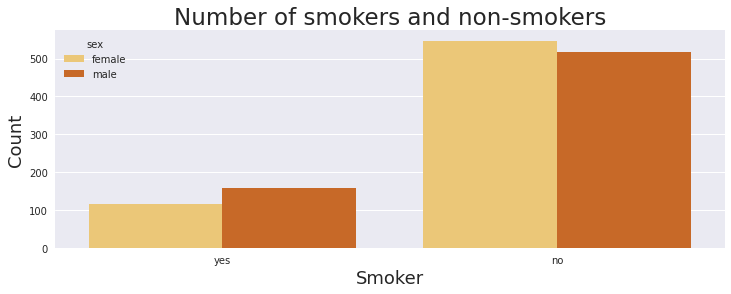

In [ ]:
#Countplot to compare the number of smokers and non-smokers
plt.figure(figsize=(12,4))
sns.countplot(x='smoker', data=df, hue='sex', palette='YlOrBr') 
plt.title('Number of smokers and non-smokers', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('Smoker',size=18)
plt.show()

### NOTE:
### - 0 for females
### - 1 for males
------------------
### - smokers = 1: yes
### - smokers = 0: no

### Males tend to smoke more than females.

### As we can see charges for smokers are much higher than charges for non-smokers. Sex doesn't have any effect on charges when you are a smoker

###  Relation between regions and charges: 

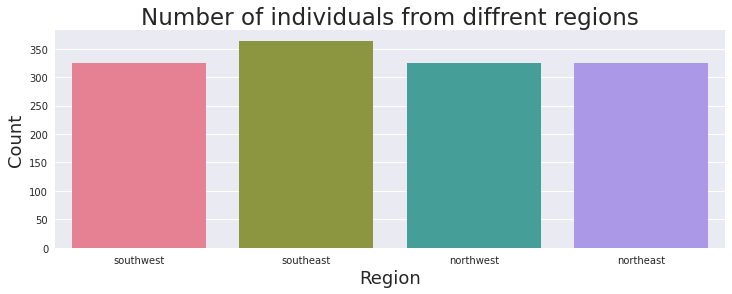

In [ ]:
#Countplot to compare the number of individuals from diffrent regions
plt.figure(figsize=(12,4))
sns.countplot(x='region', data=df, palette='husl') 
plt.title('Number of individuals from diffrent regions', size='23')
plt.ylabel('Count',size=18)
plt.xlabel('Region',size=18)
plt.show()

### Almsot all the regions have equal number of individuals.

## Conclusion: of EDA
### We have found out that region and gender does not bring significant difference on charges among its groups. Age, BMI,      number of children and smoking are the once that drives the charges. 
### As:
### - age has an impact on the charges, when a person is older the health costs are larger.
### - if you are a smoker you must expect some huge medical charges compared to non-smokers. Especially for people who have high BMI values (>35) it will result very serious health care charges.
### - no matter where you live, this won't have any impact on your medical insurance bills.
### - the number of children doesn't affect the medical costs billed by health insurance.
### - it doesn't matter if you are a men or a women your health bills won't change.

### Before modeling, we have to prepare the data types of the features:

### label encoding:
### Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form. Machine learning algorithms can then decide in a better way on how those labels must be operated.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
les = {}
for col in ['sex','smoker','region', 'weight_condition', 'age_cat']:
    les[col] = LabelEncoder()
    df[col]  = les[col].fit_transform(df[col])

In [ ]:
df.head()

,sex,children,smoker,region,charges,weight_condition,age_cat
0,0,0,1,3,16884.92400,2,2
1,1,1,0,2,1725.55230,1,2
2,1,3,0,2,4449.46200,1,2
3,1,0,0,1,21984.47061,0,2
4,1,0,0,1,3866.85520,2,2


In [ ]:
df =df.drop(columns=['sex','region'])
df.head()

,children,smoker,charges,weight_condition,age_cat
0,0,1,16884.92400,2,2
1,1,0,1725.55230,1,2
2,3,0,4449.46200,1,2
3,0,0,21984.47061,0,2
4,0,0,3866.85520,2,2


> # Modeling :

> # Splitting the data into Training data & Testing Data:

In [ ]:
x= df.drop('charges',axis=1).values
y =df.charges.values
x_tr,x_tst,y_tr,y_tst = train_test_split(x,y,test_size=.2,random_state=25)

###  Feature Scaling

### Feature scaling is a method used to normalize the range of independent variables or features of data. Feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the feature with a higher value range starts dominating when calculating distances. 

In [ ]:
sc = StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_tst = sc.transform(x_tst)

### Preparing 8 algorithms for modelling
### Some of the models have already optimized after a few run. So the values in the parameters of the algorithms have been changed according to the results.


In [ ]:
lr  = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=10)
dt  = DecisionTreeRegressor(max_depth = 3)
rf  = RandomForestRegressor(max_depth = 3, n_estimators=500)
ada = AdaBoostRegressor( n_estimators=50, learning_rate =.01)
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.2)
xgb = XGBRegressor(max_depth = 3, n_estimators=50, learning_rate =.2)
cb  = CatBoostRegressor(learning_rate =.01, max_depth =5, verbose = 0)

regressors = [('Linear Regression', lr), ('K Nearest Neighbours', knn),('Decision Tree', dt), ('Random Forest', rf), 
              ('AdaBoost', ada),('Gradient Boosting Regressor', gbr),('XGBRegressor', xgb),('CatBoostRegressor', cb)]


### Iterating the regressors to have results from 8 different models

Linear Regression : 72 %
K Nearest Neighbours : 86 %
Decision Tree : 85 %
Random Forest : 86 %
AdaBoost : 85 %
Gradient Boosting Regressor : 88 %
XGBRegressor : 88 %
CatBoostRegressor : 88 %


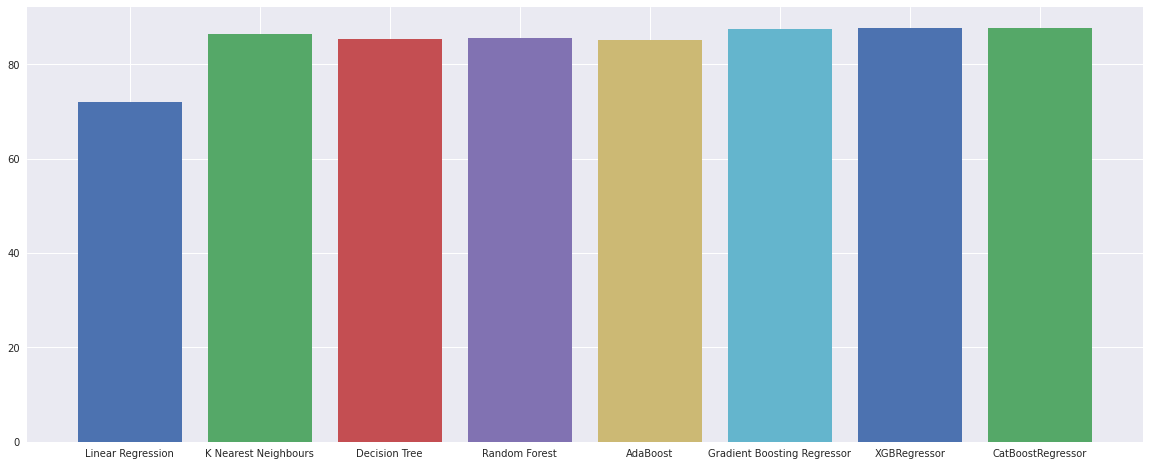

In [ ]:
for regressor_name, regressor in regressors:

    regressor.fit(x_tr, y_tr)    
  
    y_pred = regressor.predict(x_tst)
    accuracy = round(r2_score(y_tst,y_pred),3)*100
    
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name,accuracy)

### From the results it can be seen that Best Models are:
### - Gradient Boosting Regressor : 88 %
### - CatBoostRegressor : 88 %
### - XGBRegressor : 88 %


### Error metrics

 #### R square (r2) Score & Root Mean Squared Error(RMSE)
 #### R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.
 #### - To calculate the total variance, you would subtract the average actual value from each of the actual values, square the results and sum them. From there, divide the first sum of errors (explained variance) by the second sum (total variance), subtract the result from one, and you have the R-squared.
 #### - To compute RMSE, calculate the residual (difference between prediction and truth) for each data point, compute the norm of residual for each data point, compute the mean of residuals and take the square root of that mean.

### - Error metrics for Gradient Boosting Regressor

In [ ]:
y_predict = gbr.predict(x_tst)
gbr_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(gbr_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse_1 = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse_1,5))

R square Score =  0.87451
Root Mean Squared Error =  4209.24584


### - Error metrics for XGBRegressor
- note : the best algorithm

In [ ]:
y_predict = xgb.predict(x_tst)
xgb_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(xgb_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse_2 = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse_2, 5))

R square Score =  0.87804
Root Mean Squared Error =  4149.5777


### - Error metrics for CatBoostRegressor.


In [ ]:
y_predict = cb.predict(x_tst)
cb_r2_score = r2_score(y_tst, y_predict)
print('R square Score = ', round(cb_r2_score, 5))

mse = mean_squared_error(y_tst, y_predict)
rmse_3 = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse_3, 5))

R square Score =  0.87774
Root Mean Squared Error =  4154.72088


### Cross Validation
#### It is a resampling procedure which is used to evaluate the machine learning models on limited data samples. Its goal is to predict new data that is that is not tested before. 

In [ ]:
score = cross_val_score(xgb, x, y, cv=5)
print(score)

[0.85890086 0.79149981 0.85040421 0.83031141 0.86551417]


### Model Accuracy Comparison

#### Here the top 3 models will be compared with their R2 scores

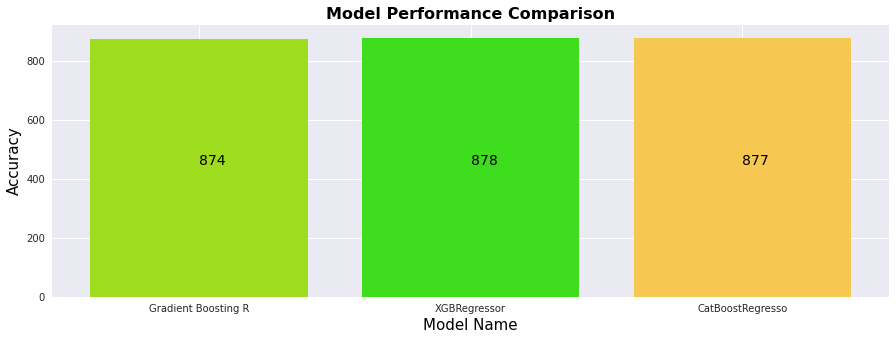

In [ ]:
r2_scores = [gbr_r2_score*1000,xgb_r2_score*1000,cb_r2_score*1000]
model_names = ["Gradient Boosting R","XGBRegressor","CatBoostRegresso"]

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(15, 5))
bar = plt.bar(model_names, r2_scores, alpha=1,color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=15, color='black')
plt.xlabel('Model Name',fontsize=15, color='black')
plt.title('Model Performance Comparison', fontsize=16, color='black', fontweight='bold')

def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

#### Here the top 3 models will be compared with their RMSE scores

In [ ]:
m = [rmse_1,rmse_2,rmse_3]
model_names = ["Gradient Boosting R","XGBRegressor","CatBoostRegressor"]

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(15, 5))
bar = plt.bar(model_names, m, alpha=1,color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=15, color='black')
plt.xlabel('Model Name',fontsize=15, color='black')
plt.title('Root Mean Squared Error', fontsize=16, color='black', fontweight='bold')

def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

NameError: name 'rmse_1' is not defined

# Conclusion
### By selecting aforementioned 8 algorithms (regressors), the modeling has been completed after a few iteration. Top performers are:
#### - Gradient Boosting Regressor
#### - XGBRegressor
#### - CatBoostRegressor
#### with accuracy of approx 88%.
#

#### 